In [1]:
# Question 8 [1.5 pts]
# The Multi-Layer NN Face Recognition Notebook in the Canvas shows detailed procedures about how to use Oivetti face
# dataset (from AT&T) to train Neural Network classifiers for face classification. The dataset in the Canvas also 
# provides “olivetti_faces.npy” and “olivetti_faces_target.npy”, which includes 400 faces in 40 classes 
# (40 different person). Please implement following face recognition task using Neural Networks.


# Import the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import warnings

In [2]:
X = np.load('olivetti_faces.npy')
y = np.load('olivetti_faces_target.npy')

# data (400 images, each 64x64)
print(X.shape)
# labels
print(y.shape)
print("\n")
print(y)

(400, 64, 64)
(400,)


[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 

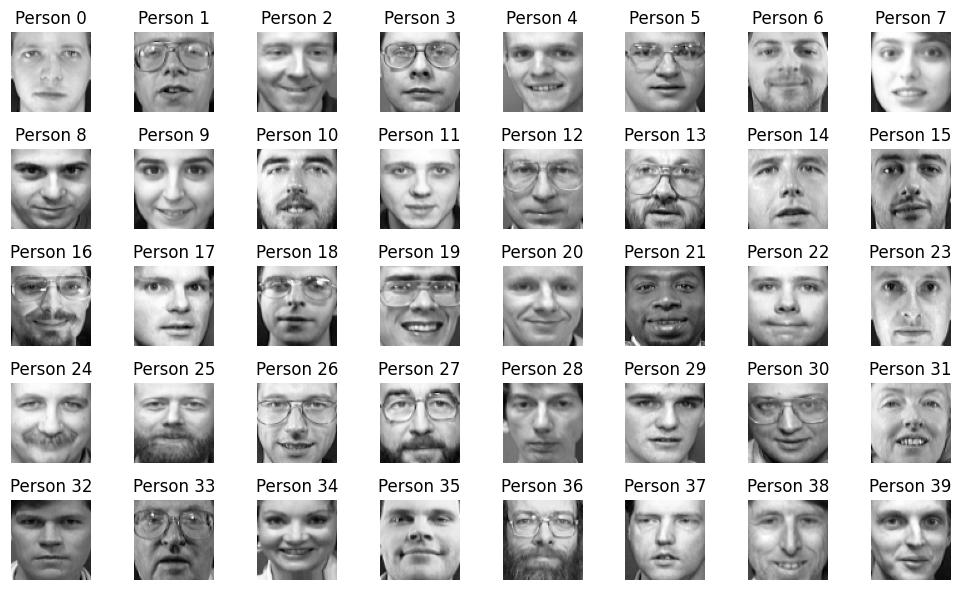

Classification accuracy: 0.0125


/Users/neelimarajawat/PycharmProjects/NR1.0/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
# 8.1 
# Please show at least one face images for each class in the Oivetti face dataset100. Randomly split the dataset into
# 60% training and 40% test samples. Train a one-hidden layer neural network with 10 hidden nodes. 
# Report the classification accuracy of the classifier on the test set [0.5 pt]

# Loading the Olivetti face dataset and target dataset
X = np.load('olivetti_faces.npy')
y = np.load('olivetti_faces_target.npy')

# Reshape the input array to have two dimensions
n_samples = X.shape[0]
X = X.reshape((n_samples, -1))

# Display one face image for each class
num_classes = np.unique(y)
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    img = X[y == num_classes[i]][0].reshape(64, 64)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Person {num_classes[i]}')
plt.tight_layout()
plt.show()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

# Train the neural network classifier
hidden_nodes = 10
classifier = MLPClassifier(hidden_layer_sizes=(hidden_nodes,), random_state=42)
classifier.fit(X_train, y_train)

# Predict the labels for the test set and calculate the classification accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy}")


In [4]:

# Flatten each 64x64 image into a single vector
X = X.reshape((X.shape[0], -1))

print(X.shape)

(400, 4096)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
print(X_train.shape)
print(X_test.shape)

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=500, random_state=42,activation='logistic',max_iter=1000)
clf.fit(X_train, y_train)

(320, 4096)
(80, 4096)


MLPClassifier(activation='logistic', hidden_layer_sizes=500, max_iter=1000,
              random_state=42, solver='lbfgs')

In [6]:
y_pred=clf.predict(X_test)
print(y_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
cf

[18 23 39  6 38 28 19 22  4 24 37  7 34 32  8 31 25 34 27 29 24  5  2 26
 11 26 11 33  5 35 35 13 39  4  2 10 30 36 15 17  9 29  9  1 14  7 14  1
  6  3 15 30  0  3 27 16 20 32 12 28 21 25 19 38 22 16 33 31 17 23 13 10
 37 20  8 12 21 36 18  0]
[18 23 39  6 28 28 19 24  5 24 37  7 34 32  8 31 25 34 31 29 24  5  2 26
 11 26 11 33  5 35 35 13 39 20  2 10 30 36 15 17  9 29  9 31 14  7 14  1
  6 14 15 30  0  3 27 16 20 32  0 28 21 24 19 29 22 16 33 30 17 23 13 10
 37 20 22  2 21 36 18  0]


array([[2, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [7]:
# use scikit-learn to calculate accuracy. 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8375

In [8]:
# 8.2 
# Please use one time 10-fold cross validation to compare the performance of different neural network architectures, 
# including (1) one-hidden layer NN with 10 hidden nodes, (2) one-hidden layer NN with 50 hidden nodes, 
# (3) one-hidden layer NN with 500 hidden nodes, and (4) two-hidden layer NN with 50 hidden nodes (1st layer) and 
# 10 hidden nodes (2n layer). Please report and compare the cross-validation accuracy of the four neural networks, 
# and conclude which classifier has the best performance [1 pt].



In [9]:
from sklearn.model_selection import KFold

X = X.reshape((X.shape[0], -1)) 

kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(X)

Acc = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=500, random_state=42, activation= 'logistic', max_iter=1000)
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred))
    
print(Acc)
print("The average accuracy of the Classifier is %.4f" % np.mean(Acc))

[0.875, 0.9, 0.875, 0.8, 0.8, 0.8, 0.875, 0.725, 0.85, 0.925]
The average accuracy of the Classifier is 0.8425


In [1]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import warnings


warnings.filterwarnings("ignore")

X = X.reshape((X.shape[0], -1))

kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)

architectures = [
    {'hidden_layer_sizes': (10,), 'name': 'One-hidden layer (10 nodes)'},
    {'hidden_layer_sizes': (50,), 'name': 'One-hidden layer (50 nodes)'},
    {'hidden_layer_sizes': (500,), 'name': 'One-hidden layer (500 nodes)'},
    {'hidden_layer_sizes': (50, 10), 'name': 'Two-hidden layer (50, 10 nodes)'}
]

results = []

for architecture in architectures:
    Acc = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = MLPClassifier(solver='lbfgs', random_state=42, activation='logistic',
                            max_iter=1000, hidden_layer_sizes=architecture['hidden_layer_sizes'])
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Acc.append(accuracy_score(y_test, y_pred))

    avg_acc = np.mean(Acc)
    results.append({'architecture': architecture['name'], 'accuracy': avg_acc})

# Print the results
for result in results:
    print(f"Architecture: {result['architecture']}")
    print(f"Cross-validation Accuracy: {result['accuracy']:.4f}")
    print('')

best_architecture = max(results, key=lambda x: x['accuracy'])
print(f"The best performing architecture is: {best_architecture['architecture']}")


NameError: name 'X' is not defined